# Домашнее задание 4. Временные ряды со сложным трендом и сложной сезонностью

# Модель Prophet (4 балла)

[Данные доступны на сайте Kaggle](https://www.kaggle.com/robikscube/hourly-energy-consumption). Из доступных файлов используется AEP_hourly.csv.

Временной ряд содержит данные о спросе на энергию от нескольких поставщиков электроэнергии с различными сферами обслуживания. Выбран временной ряд для American Electric Power (AEP).

In [17]:
import pandas as pd
df_aep = pd.read_csv('hw_AEP.csv', index_col=0)
df_aep

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


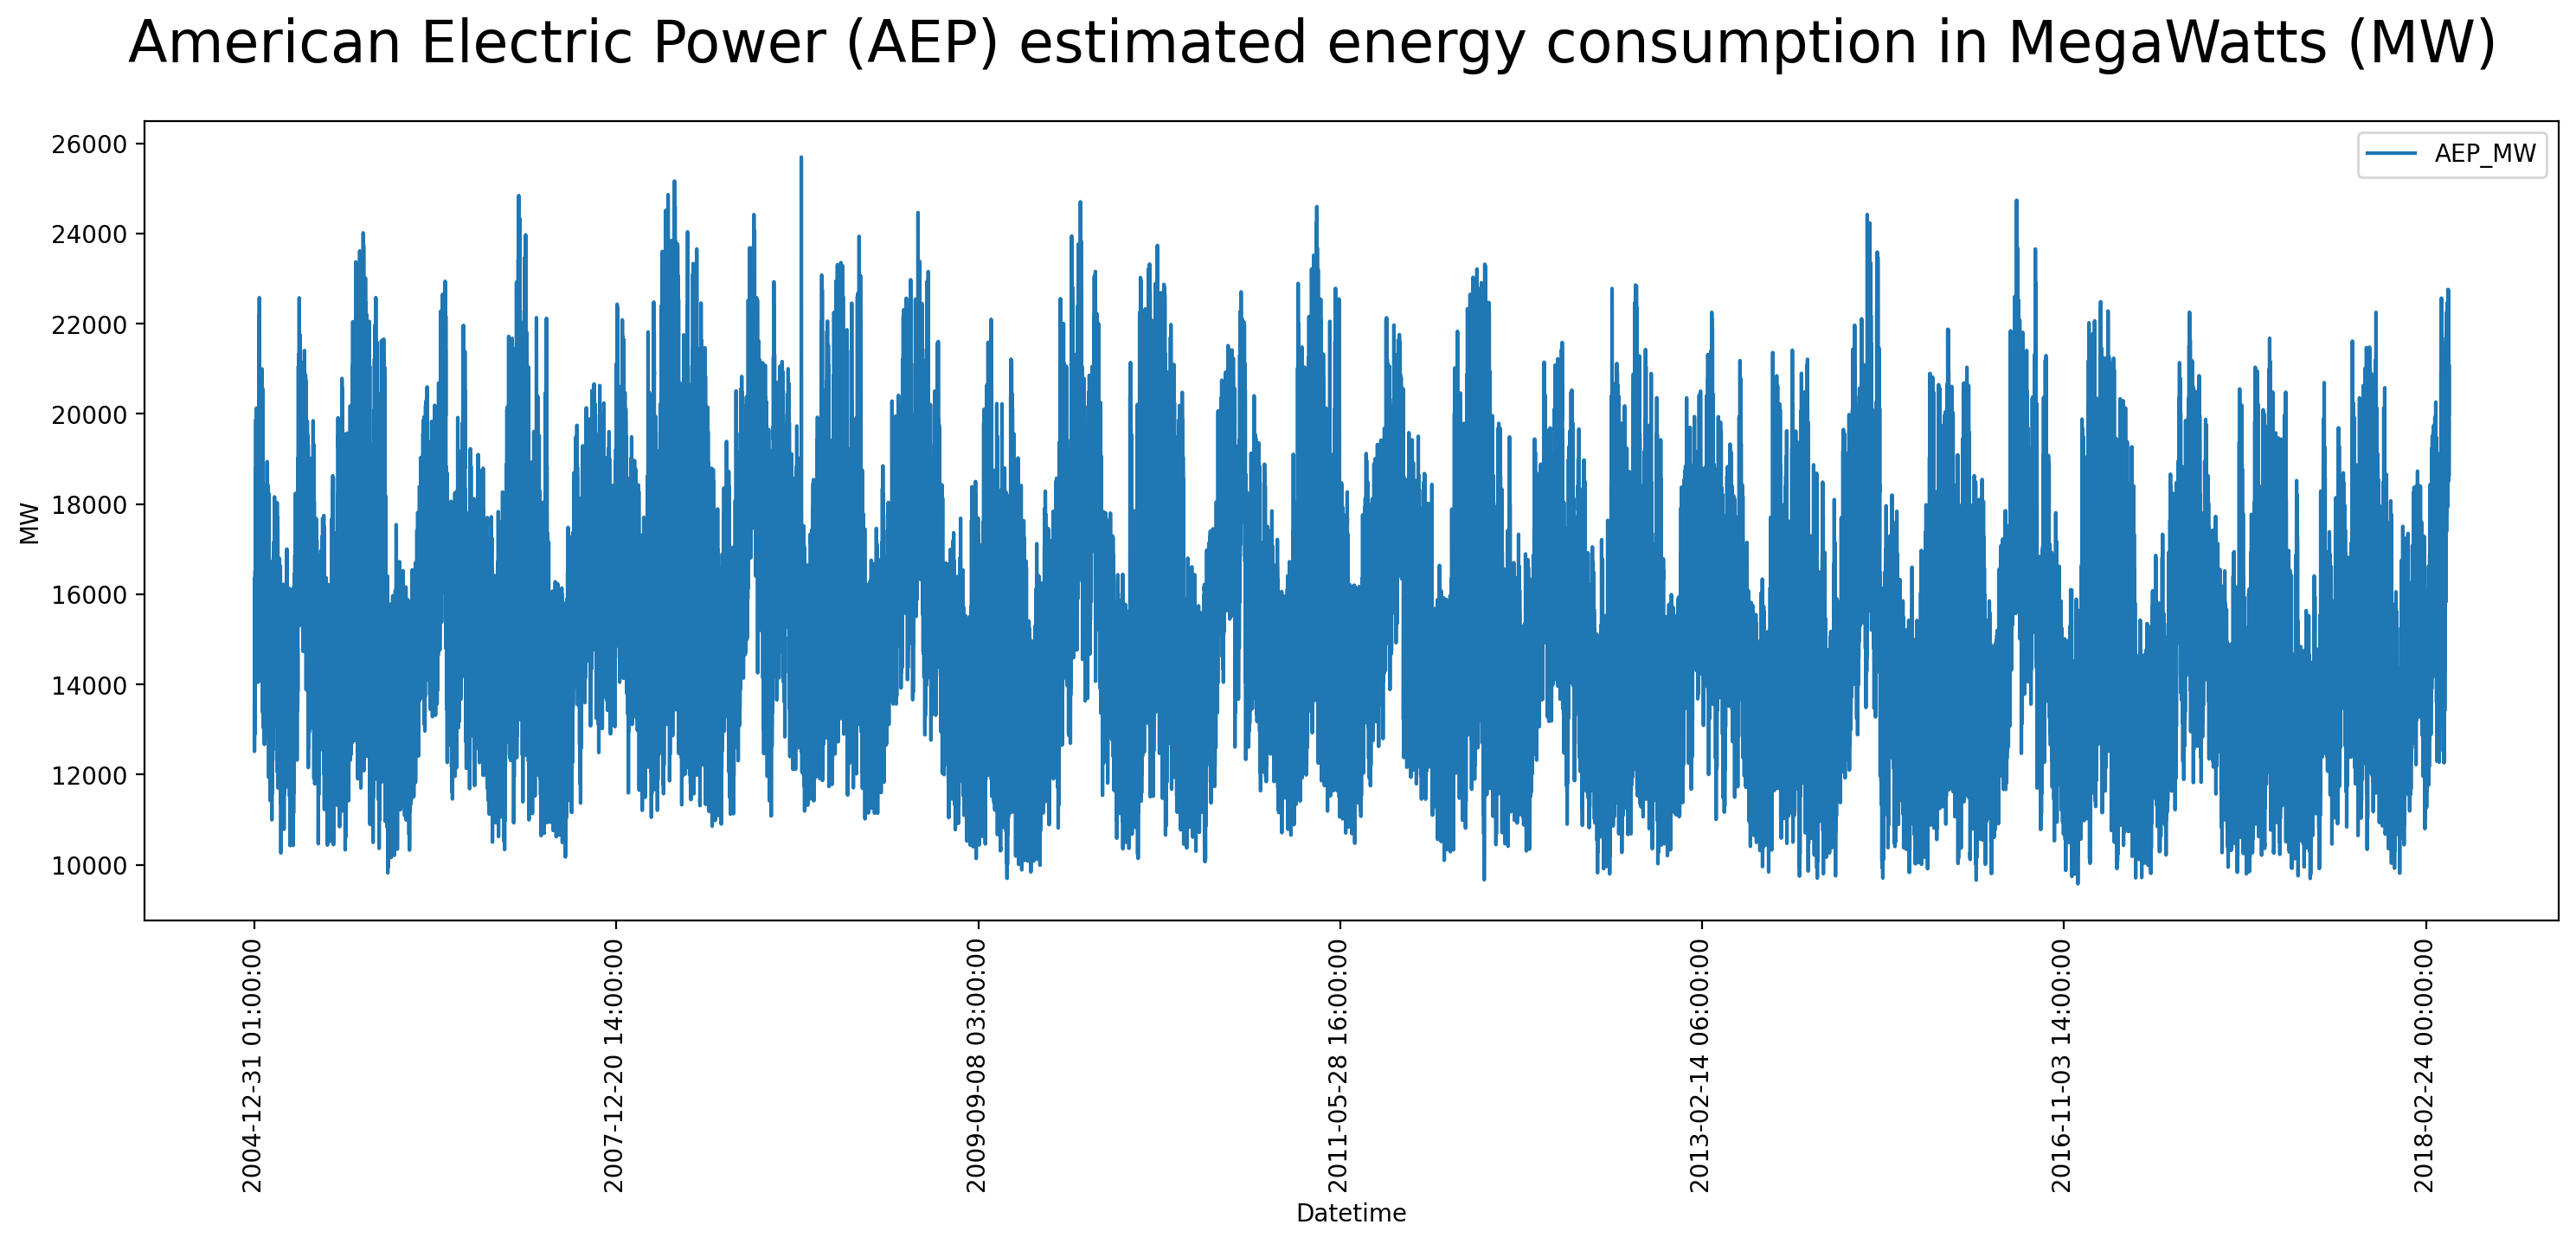

In [18]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,6),dpi=200);
plt.suptitle('American Electric Power (AEP) estimated energy consumption in MegaWatts (MW)', fontsize=24);
df_aep.plot(ax=ax,rot=90,ylabel='MW');

Выполни необходимую предварительную обработку (NaN, дубликаты, формат даты и так далее), преобразуй данные в формат Prophet.

Раздели данные на обучающие и тестовые.

In [19]:
from prophet import Prophet

In [20]:
# твой код
df_aep.index = pd.to_datetime(df_aep.index)
df_aep = df_aep.drop_duplicates()
df_aep = df_aep.dropna()

df_prophet = df_aep.reset_index()
df_prophet.columns = ['ds', 'y']

size_ = int(len(df_prophet) * 0.8)
train = df_prophet[: size_]
test = df_prophet[size_: ]

Построй базовую модель Prophet. Построй точечный прогноз и доверительные интервалы. Оцени точность модели на кросс-валидации и на тестовой выборке. Постой графики компонентов и прогнозов.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/a4qc7l4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/d_0fvbxu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54577', 'data', 'file=/tmp/tmpzcg95udr/a4qc7l4p.json', 'init=/tmp/tmpzcg95udr/d_0fvbxu.json', 'output', 'file=/tmp/tmpzcg95udr/prophet_modelnmhn02m3/prophet_model-20241127172626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:26:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:26:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


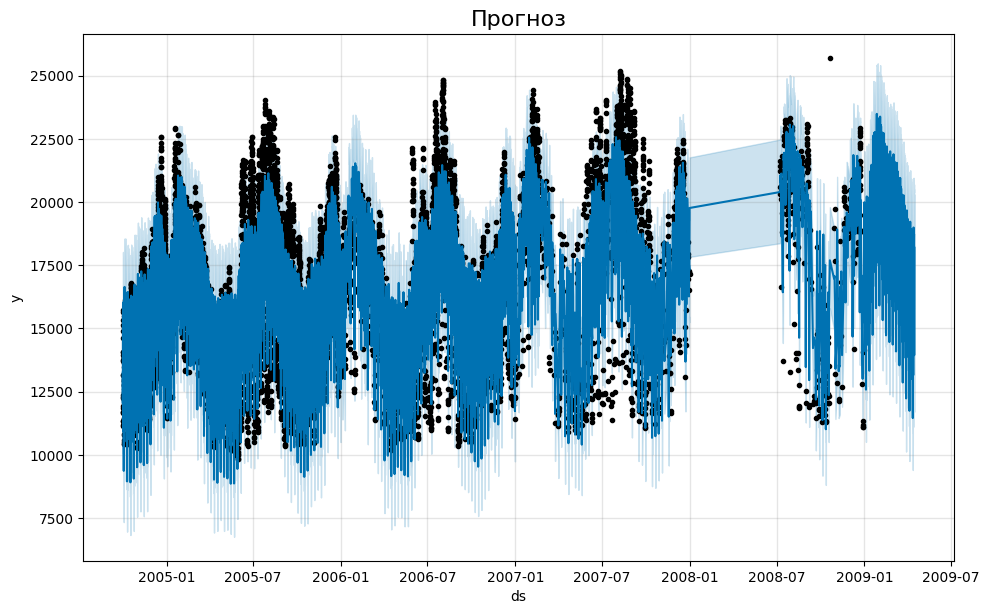

In [21]:
# твой код
model = Prophet()
model.fit(train)

future = model.make_future_dataframe(periods=len(test), freq='h')
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title("Прогноз", fontsize=16)
plt.show()

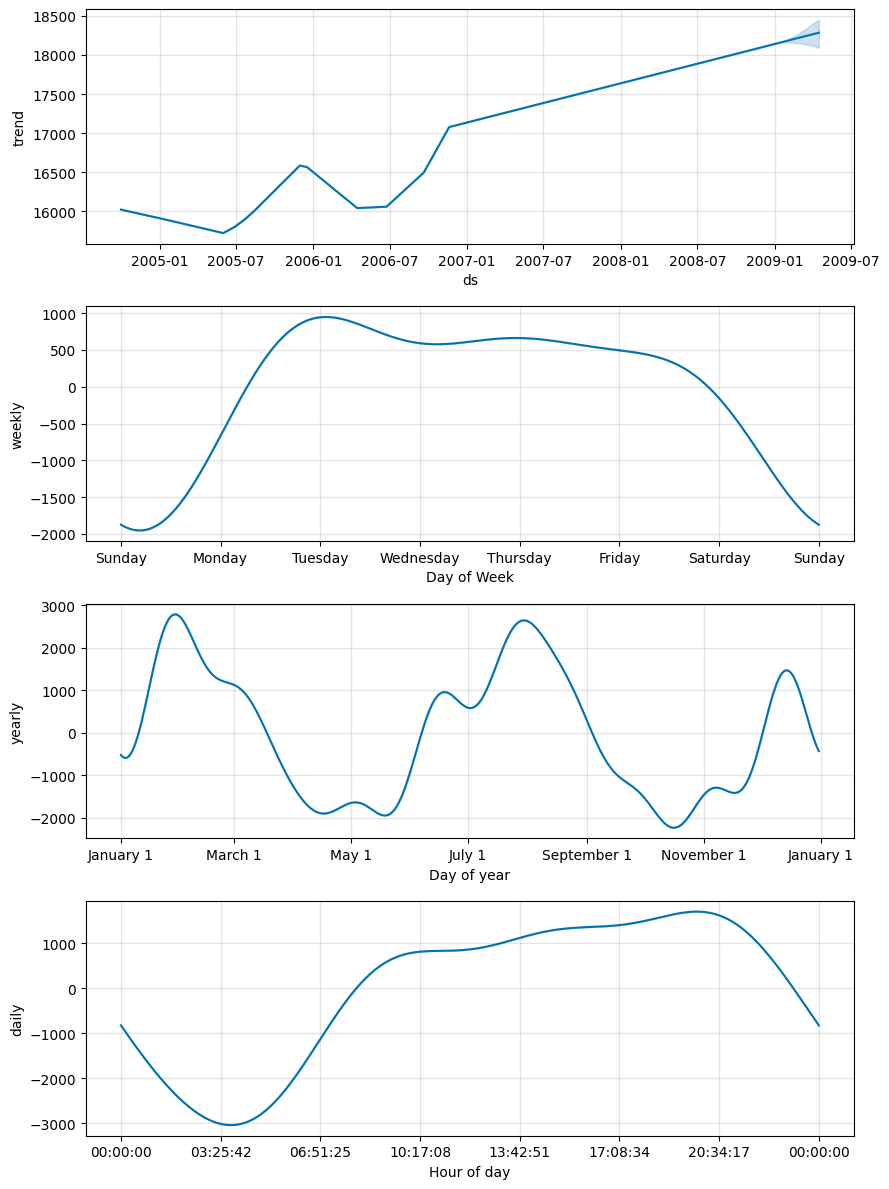

In [22]:
model.plot_components(forecast)
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
forecast_test = forecast[-len(test):]
mean_absolute_error(test['y'], forecast_test['yhat']), mean_squared_error(test['y'], forecast_test['yhat'])

(5298.818256834929, 39089305.7240469)

<ipython-input-25-74a94e1c75f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['yhat'] = forecast_test['yhat'].values


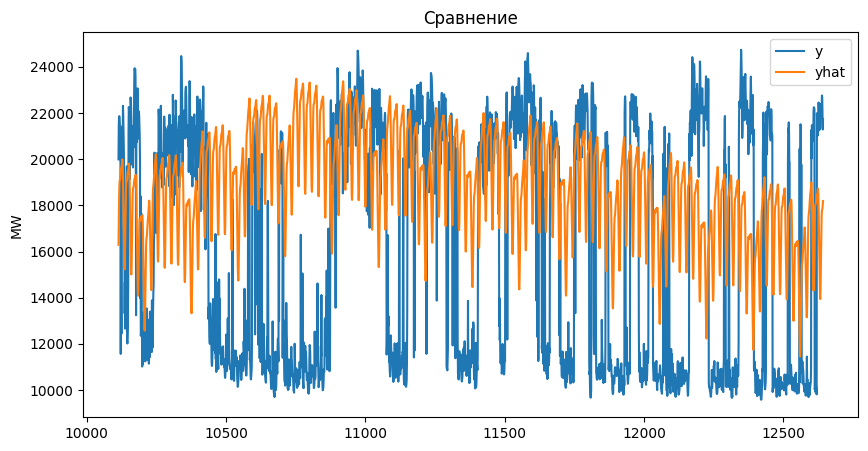

In [25]:
test['yhat'] = forecast_test['yhat'].values
test[['y', 'yhat']].plot(figsize=(10, 5), title="Сравнение")
plt.ylabel('MW')
plt.show()

In [26]:
from prophet.diagnostics import cross_validation, performance_metrics

cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
performance = performance_metrics(cv_results)
print(performance)

INFO:prophet:Making 3 forecasts with cutoffs between 2007-01-06 05:00:00 and 2008-01-01 05:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/wrp15q3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/tw_65qh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16064', 'data', 'file=/tmp/tmpzcg95udr/wrp15q3q.json', 'init=/tmp/tmpzcg95udr/tw_65qh7.json', 'output', 'file=/tmp/tmpzcg95udr/prophet_model4nluk7sl/prophet_model-20241127172635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/_04ruaaz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/81_bzksk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

               horizon           mse         rmse          mae      mape  \
0     30 days 06:00:00  6.193556e+06  2488.685642  1923.136087  0.105138   
1     30 days 07:00:00  6.265113e+06  2503.020705  1939.734517  0.105869   
2     30 days 08:00:00  6.319133e+06  2513.788552  1952.644764  0.106400   
3     30 days 11:00:00  6.336664e+06  2517.273052  1959.340303  0.106704   
4     30 days 13:00:00  6.368038e+06  2523.497261  1969.911322  0.107170   
...                ...           ...          ...          ...       ...   
2076 361 days 23:00:00  4.511247e+06  2123.969742  1781.939074  0.092845   
2077 362 days 00:00:00  4.562650e+06  2136.036145  1791.205475  0.093901   
2078 362 days 01:00:00  4.630551e+06  2151.871622  1802.455626  0.095102   
2079 362 days 07:00:00  4.711099e+06  2170.506704  1816.386242  0.096158   
2080 365 days 00:00:00  4.748476e+06  2179.099834  1827.131823  0.096939   

         mdape     smape  coverage  
0     0.065491  0.102233  0.612648  
1     0.06627

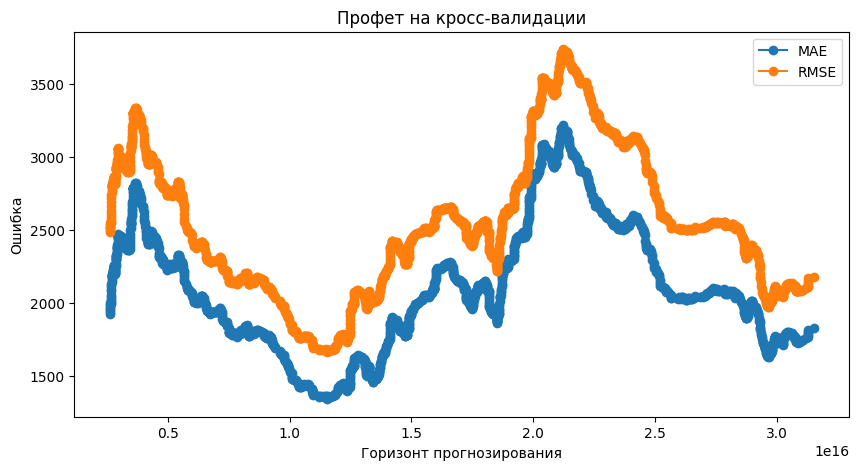

In [27]:
fig = plt.figure(figsize=(10, 5))
plt.plot(performance['horizon'], performance['mae'], marker='o', label='MAE')
plt.plot(performance['horizon'], performance['rmse'], marker='o', label='RMSE')
plt.xlabel('Горизонт прогнозирования')
plt.ylabel('Ошибка')
plt.title('Профет на кросс-валидации')
plt.legend()
plt.show()

Добавь праздники и особые дни и оцени качество модели.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/cdr116ab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/ucl04utd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11593', 'data', 'file=/tmp/tmpzcg95udr/cdr116ab.json', 'init=/tmp/tmpzcg95udr/ucl04utd.json', 'output', 'file=/tmp/tmpzcg95udr/prophet_modelpn_9dwil/prophet_model-20241127172652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:26:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:26:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


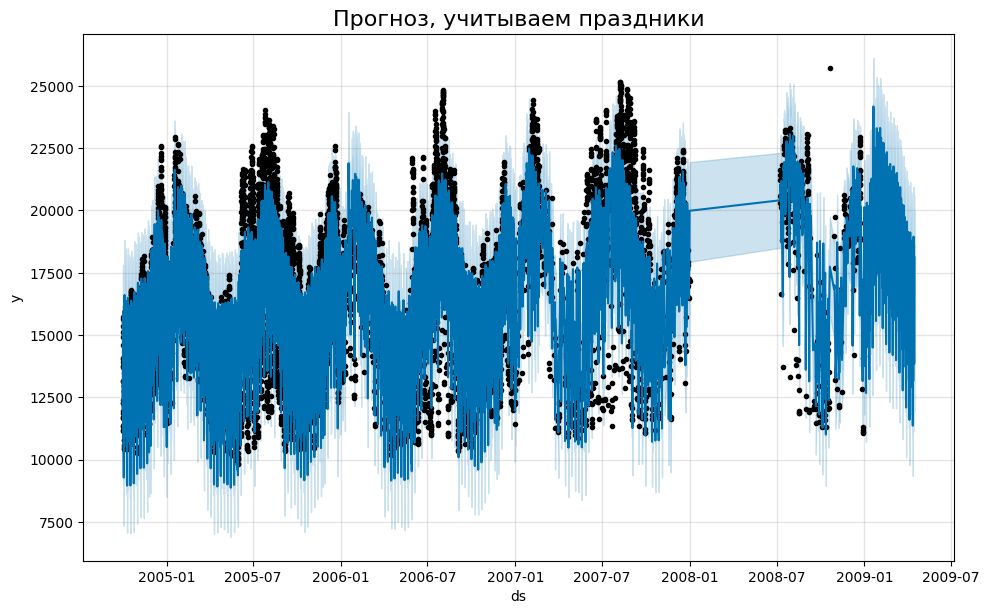

In [28]:
# твой код
model = Prophet()
model.add_country_holidays(country_name = 'US')
model.fit(train)
future = model.make_future_dataframe(periods=len(test), freq='H')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Прогноз, учитываем праздники", fontsize=16)
plt.show()

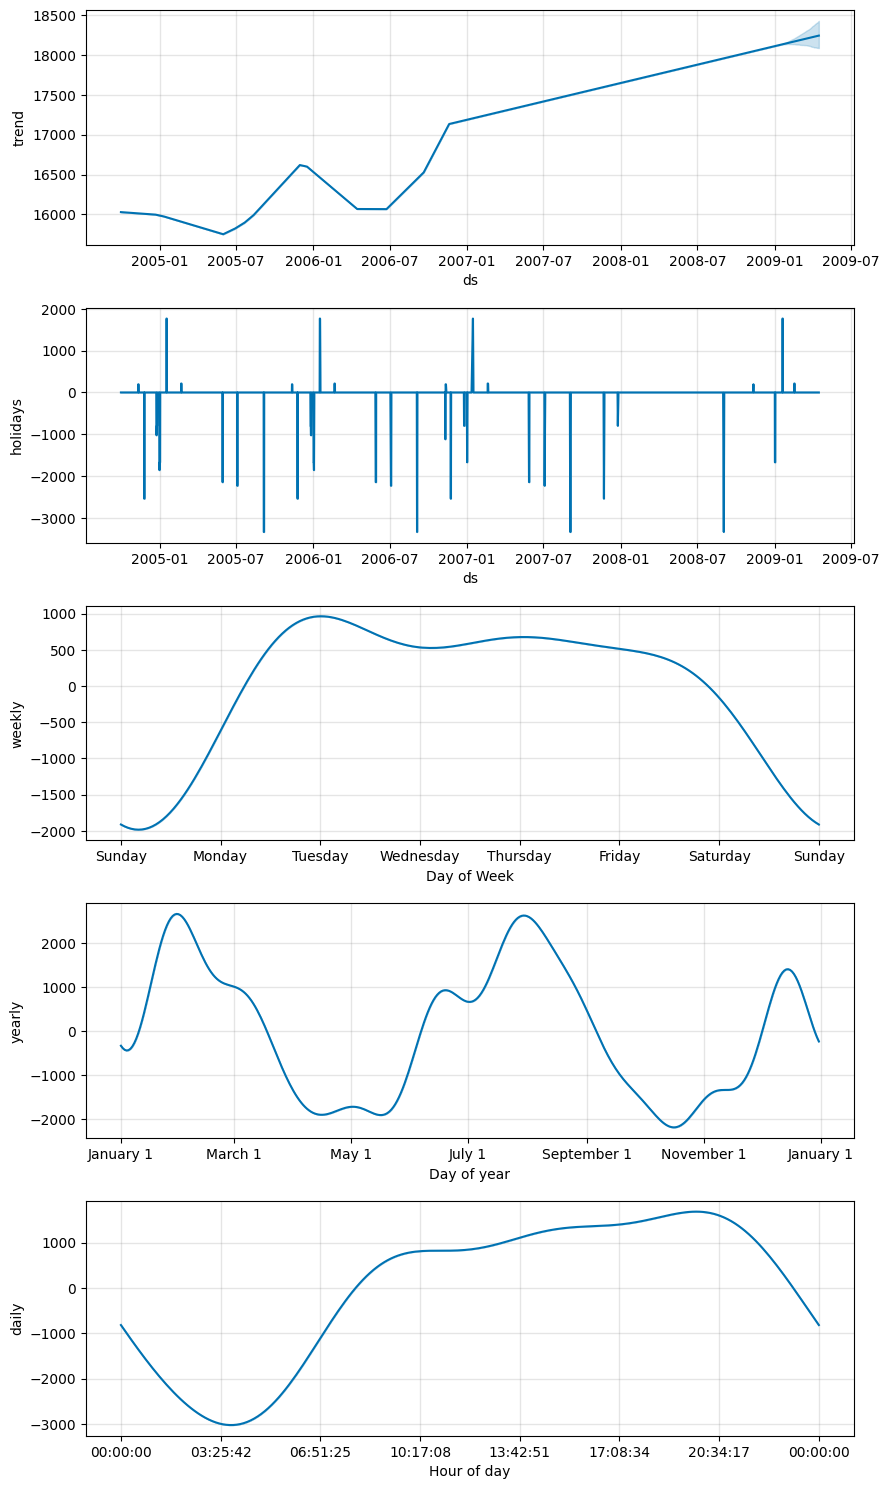

In [29]:
model.plot_components(forecast)
plt.show()

In [30]:
forecast_test = forecast[-len(test):]
mean_absolute_error(test['y'], forecast_test['yhat']), mean_squared_error(test['y'], forecast_test['yhat'])

(5282.822031363954, 38586022.75973071)

Ошибка стала поменьше, это круто, праздники действительно дают возможность лучше оценить и предсказать ряд

<ipython-input-31-574f6b1e4687>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['yhat'] = forecast_test['yhat'].values


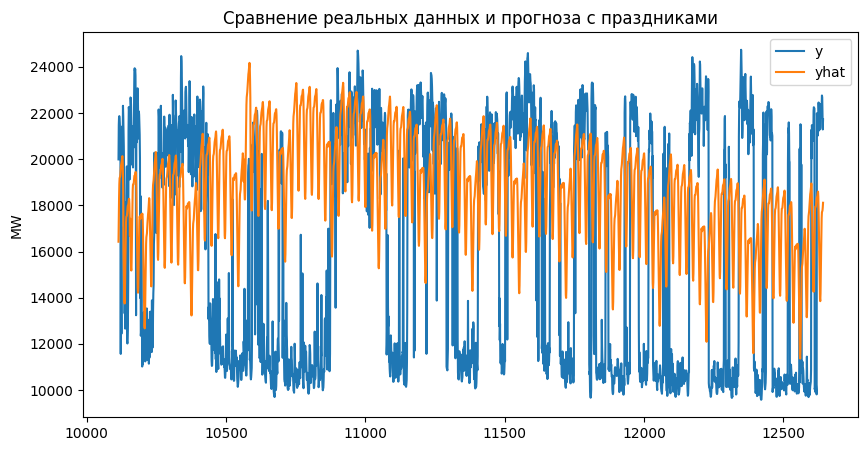

In [31]:
test['yhat'] = forecast_test['yhat'].values
test[['y', 'yhat']].plot(figsize=(10, 5), title="Сравнение реальных данных и прогноза с праздниками")
plt.ylabel('MW')
plt.show()

Настрой модели для тренда и сезонной компоненты. Попробуй разные модели тренда: линейную и логистическую. Определи лучший набор гиперпараметров. Оцени качество новой модели.

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
res = []

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/g4a20614.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/9_mo3lke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97287', 'data', 'file=/tmp/tmpzcg95udr/g4a20614.json', 'init=/tmp/tmpzcg95udr/9_mo3lke.json', 'output', 'file=/tmp/tmpzcg95udr/prophet_modelltlai8hp/prophet_model-20241127175422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


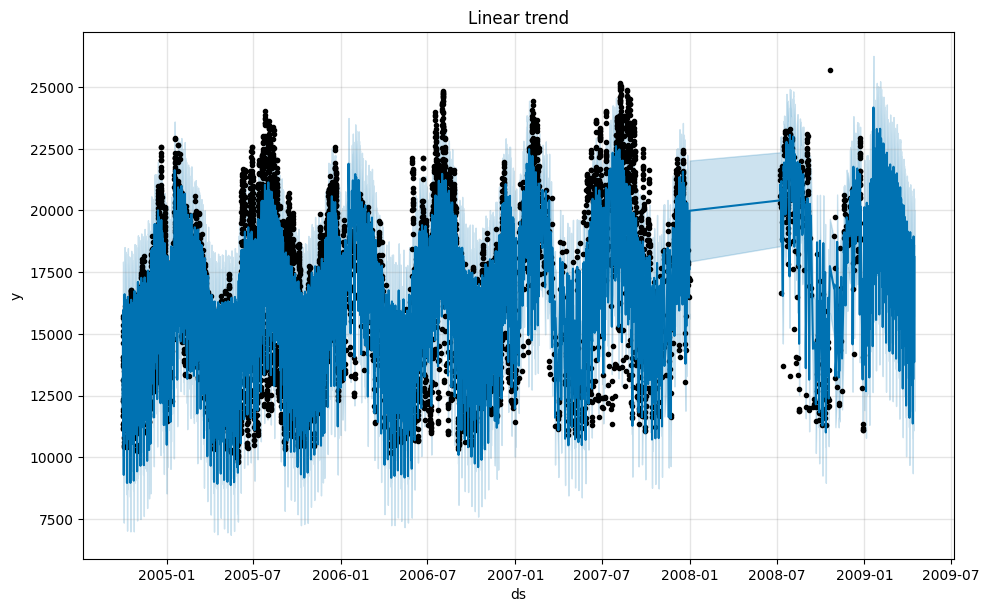

In [36]:
train['cap'] = None
test['cap'] = None

model_linear = Prophet(
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
model_linear.add_country_holidays(country_name='US')
model_linear.fit(train)


future_linear = model_linear.make_future_dataframe(periods=len(test), freq='H')
forecast_linear = model_linear.predict(future_linear)

frcst_test_linear = forecast_linear[-len(test):]
res.append({
    'trend': 'linear',
    'mae': mean_absolute_error(test['y'], frcst_test_linear['yhat']),
    'mse': mean_squared_error(test['y'], frcst_test_linear['yhat']),
    'forecast': forecast_linear
})


fig = model_linear.plot(forecast_linear)
plt.title("Linear trend")
plt.show()


у меня ни разу не хватило терпения дождаться этой ячейки, плюсы в том, что логистический тренд мало подходит тут


DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/3ubj21y7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/be2bcrq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89137', 'data', 'file=/tmp/tmpzcg95udr/3ubj21y7.json', 'init=/tmp/tmpzcg95udr/be2bcrq3.json', 'output', 'file=/tmp/tmpzcg95udr/prophet_modelpctr3wrz/prophet_model-20241127181118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


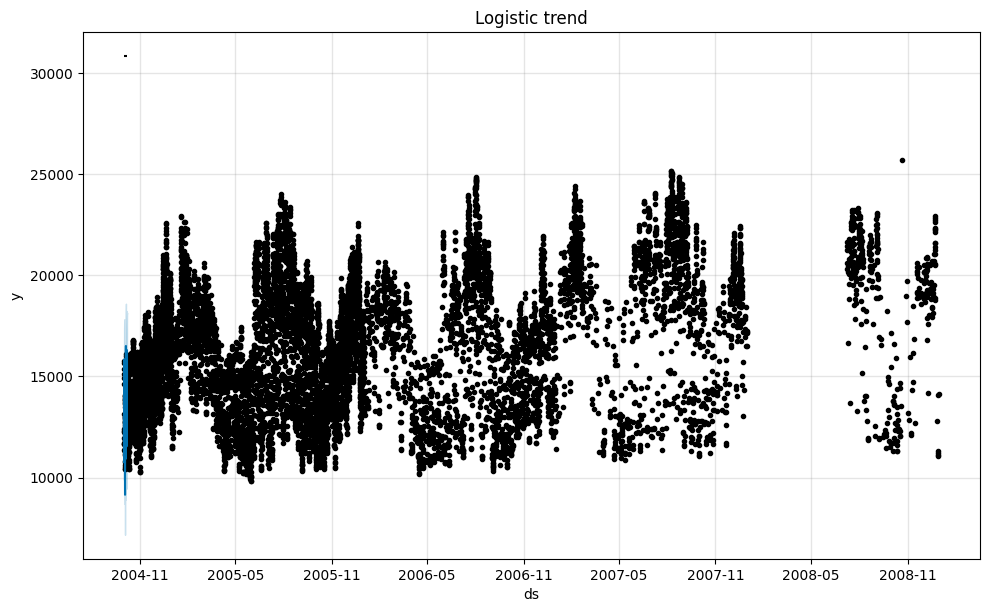

In [41]:
train['cap'] = train['y'].max() * 1.2
test['cap'] = test['y'].max() * 1.2

model_logistic = Prophet(
    growth='logistic',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
model_logistic.add_country_holidays(country_name='US')
model_logistic.fit(train)

future_logistic = model_logistic.make_future_dataframe(
                                                        periods=len(test), freq='H')
future_logistic['cap'] = train['cap'].iloc[0]
forecast_logistic = model_logistic.predict(future_logistic.iloc[:100])

frcst_test_logistic = forecast_logistic[-len(test):]
res.append({
    'trend': 'logistic',
    'mae': mean_absolute_error(test['y'][:100], frcst_test_logistic['yhat']),
    'mse': mean_squared_error(test['y'][:100], frcst_test_logistic['yhat']),
    'forecast': forecast_logistic
})

fig = model_logistic.plot(forecast_logistic)
plt.title("Logistic trend")
plt.show()

Сравни все построенные модели.

Линейный тренд предполагает, что данные изменяются с постоянной скоростью, а логистический - что они могут расти и падать по ходу времени, но в рамках некоторых ограничений. Здесь я бы сказала, что тренд до 2007 года больше логистический, а вот дальше он вполне линейный, соответственно, и профет с линейным трендом на тесте будет получше. В плане сезонности тут сложнее, но я бы выделила все доступные при разложении на компоненты, потому что по графикам явно видны влияния этих компонент на значения.

In [42]:
pd.DataFrame(res)

,trend,mae,mse,forecast
0,linear,5288.094029,4.029660e+07,ds trend yha...
1,linear,5282.822031,3.858602e+07,ds trend yha...
2,logistic,5881.828367,4.529577e+07,ds trend cap ...
3,logistic,5881.828367,4.529577e+07,ds trend cap ...


### SETAR и BATS/TBATS (1 балл)

Используй модель BATS/TBATS для построения прогнозов.

In [ ]:
!pip install sktime[all_extras]

In [ ]:
!pip install tbats

In [52]:
from tbats import BATS, TBATS

In [64]:
train_new = train.set_index('ds')
train_new = train_new['y']
bats_model = BATS(seasonal_periods=[24, 168])
bats_fit = bats_model.fit(train_new)
y_pred_BATS = bats_fit.forecast(steps=len(test))

In [71]:
tbats_model = TBATS(seasonal_periods=[24, 168])
tbats_fit = tbats_model.fit(train_new)
y_pred_TBATS = tbats_fit.forecast(steps=len(test))

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label="Тест")
plt.plot(test.index, y_pred_BATS, label="Прогноз BATS")
plt.legend()
plt.title("BATS")
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label="Тест")
plt.plot(test.index, y_pred_TBATS, label="Прогноз TBATS")
plt.legend()
plt.title("TBATS")
plt.show()

In [72]:
mean_absolute_error(test['y'], y_pred_BATS), mean_absolute_error(test['y'], y_pred_TBATS)

(9898.13892066866, 9898.13892066866)

Имеет ли смысл применять к этому временному ряду модель SETAR?

SETAR применяется к временным рядам, которые показывают какое-то нелинейное поведение или переходы между разными типами поведения.

Для нашего временного ряда потребления электроэнергии, так как вроде в данных нет супер четко выраженных пороговых эффектов, SETAR малоприменима, а вот BATS/TBATS больше подходят для моделирования сезонности и тренда. Мне так кажется...

# Применение модели Prophet к персональному набору данных (5 баллов)

Не забудь, что Prophet --- модель для одномерных временных рядов. Для набора временных рядов обучается множество локальных моделей. Смотри файл из дополнительных материалов недели «Часть 1_12._Прогнозирование нескольких рядов в Prophet (на примере задачи «Райффайзен Банка»).ipynb» к книге Груздева, Рафферти.

Подумай, нужно ли строить одинаковую модель для всех временных рядов в наборе или для разных рядов надо подбирать свои компоненты и параметры для модели.

Повтори схему построений модели из первой части домашнего задания + добавь к ней дополнительные признаки и их отбор.

тут я в итоге забыла и запуталась, к чему применять профет, поэтому сделала для своего датасета...

мой набор данных - вот это https://www.kaggle.com/datasets/m0h1t50n1/google-traffic-flow-dataset?select=train.csv

я беру первый трейн-файл



In [77]:
# твой код
df = pd.read_csv('train (1).csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   5 Minutes                    7776 non-null   object
 1   Lane 1 Flow (Veh/5 Minutes)  7776 non-null   int64 
 2   # Lane Points                7776 non-null   int64 
 3   % Observed                   7776 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 243.1+ KB


In [80]:
df.head()

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),# Lane Points,% Observed
0,04/01/2016 0:00,12,1,100
1,04/01/2016 0:05,13,1,100
2,04/01/2016 0:10,11,1,100
3,04/01/2016 0:15,13,1,100
4,04/01/2016 0:20,10,1,100


In [84]:
df['datetime'] = pd.to_datetime(df['5 Minutes'], format='mixed')
df.head()

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),# Lane Points,% Observed,datetime
0,04/01/2016 0:00,12,1,100,2016-04-01 00:00:00
1,04/01/2016 0:05,13,1,100,2016-04-01 00:05:00
2,04/01/2016 0:10,11,1,100,2016-04-01 00:10:00
3,04/01/2016 0:15,13,1,100,2016-04-01 00:15:00
4,04/01/2016 0:20,10,1,100,2016-04-01 00:20:00


In [89]:
df['datetime'].max()

Timestamp('2016-12-01 23:55:00')

In [91]:
df = df.drop_duplicates()
df = df.dropna()
df_prophet = df[['datetime', 'Lane 1 Flow (Veh/5 Minutes)']]
df_prophet.columns = ['ds', 'y']

size_ = int(len(df_prophet) * 0.9)
train = df_prophet[: size_]
test = df_prophet[size_: ]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/yx4s3mxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/bvzta5q0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33500', 'data', 'file=/tmp/tmpzcg95udr/yx4s3mxh.json', 'init=/tmp/tmpzcg95udr/bvzta5q0.json', 'output', 'file=/tmp/tmpzcg95udr/prophet_modelpcp5d8j4/prophet_model-20241127185052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:50:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:50:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


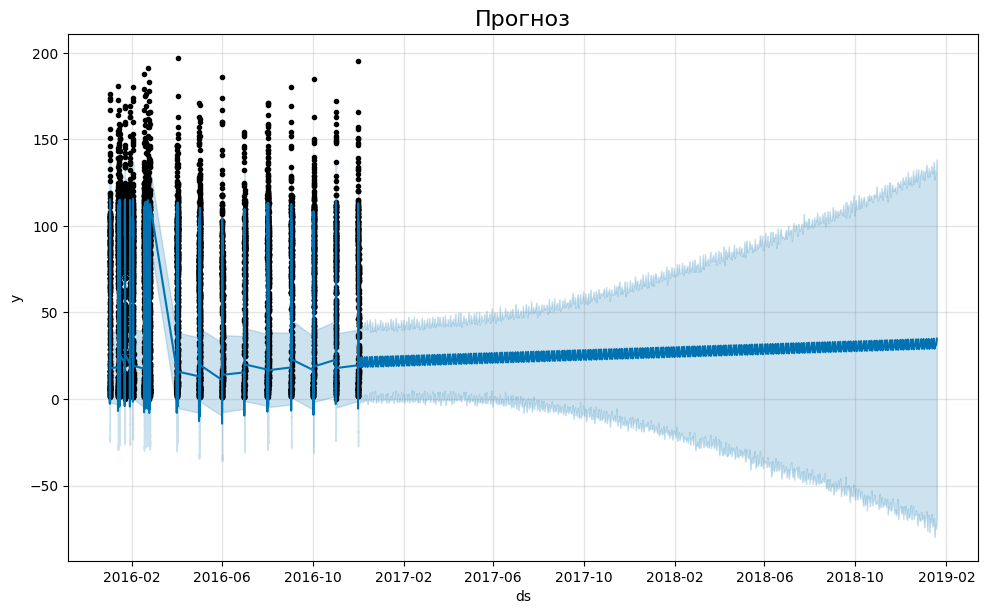

In [92]:
model = Prophet()
model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title("Прогноз", fontsize=16)
plt.show()

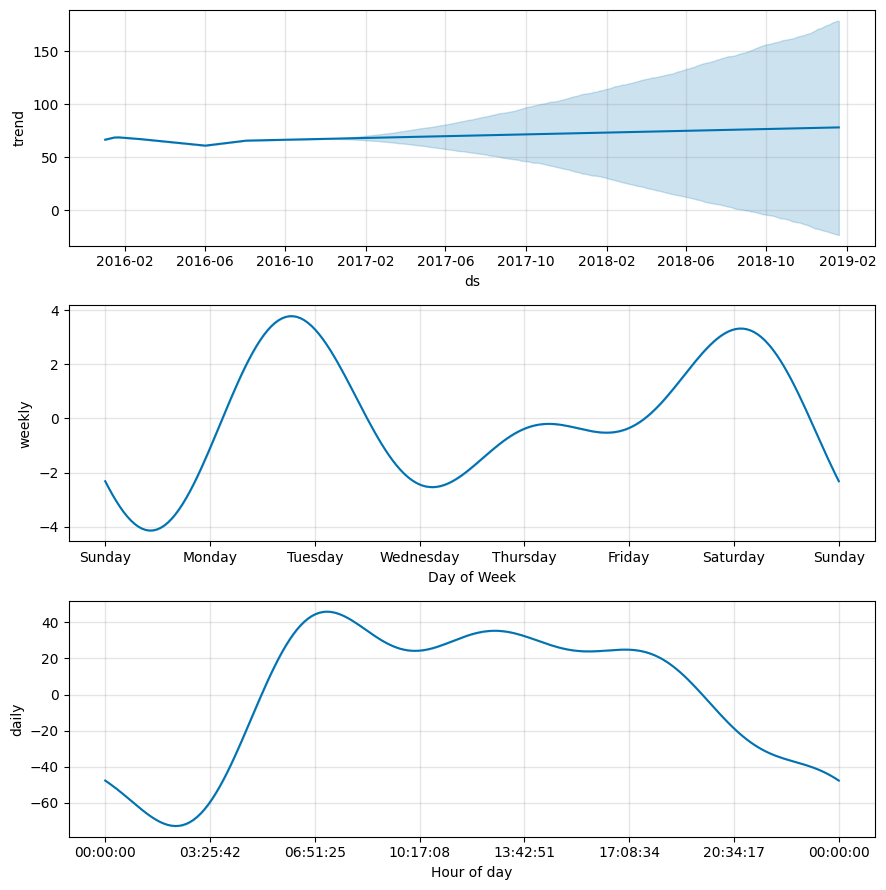

In [93]:
model.plot_components(forecast)
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/1qhd9e2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzcg95udr/u0b1h7bc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65238', 'data', 'file=/tmp/tmpzcg95udr/1qhd9e2f.json', 'init=/tmp/tmpzcg95udr/u0b1h7bc.json', 'output', 'file=/tmp/tmpzcg95udr/prophet_modelabwob123/prophet_model-20241127185216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:52:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:52:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


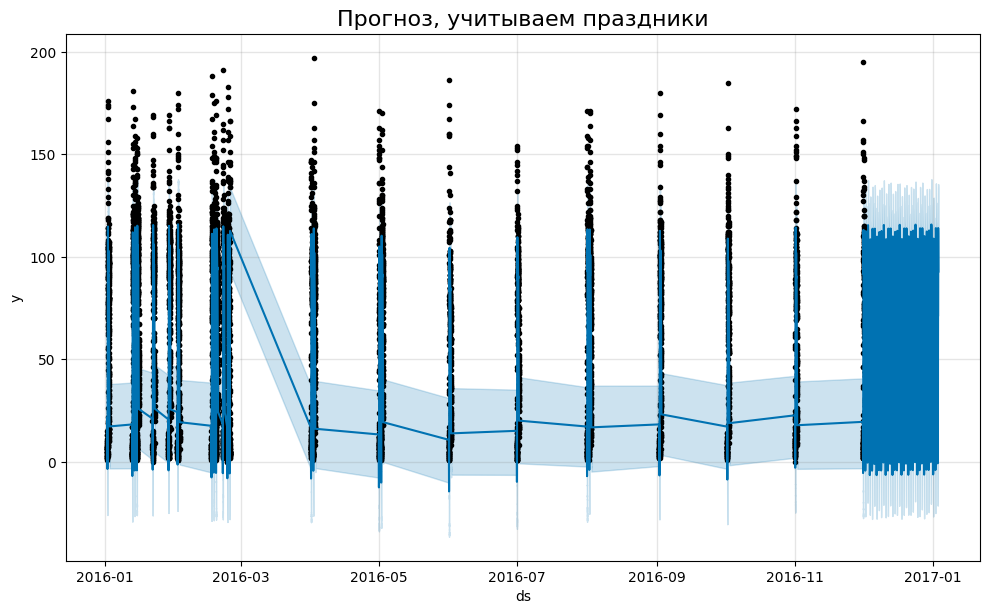

In [94]:
model = Prophet()
model.add_country_holidays(country_name = 'US')
model.fit(train)
future = model.make_future_dataframe(periods=len(test), freq='H')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Прогноз, учитываем праздники", fontsize=16)
plt.show()

In [95]:
forecast_test = forecast[-len(test):]
mean_absolute_error(test['y'], forecast_test['yhat']), mean_squared_error(test['y'], forecast_test['yhat'])

(43.78451703916582, 3042.9901726125013)

Сравни качество модели на основе Prophet с качеством моделей, построенных ранее для этого датасета.

In [ ]:
# твой код

#### Бонус (1 балл)

Используй модели SETAR, GARCH и BATS/TBATS, если у твоего набора данных есть к этому предрасположенность. Использование моделей нужно предварительно обосновать.

#### За лучшую работу начисляется 1 бонусный балл